In [1]:
import sys

print("Python version: {}".format(sys.version))

import pandas as pd

print("Pandas version: {}".format(pd.__version__))

import matplotlib

print("Matplotlib version: {}".format(matplotlib.__version__))

import numpy as np

print("NumPy version: {}".format(np.__version__))

import scipy as sp

print("SciPy version: {}".format(sp.__version__))

import IPython
from IPython import display

print("IPython version: {}".format(IPython.__version__))

import sklearn

print("scikit-learn version: {}".format(sklearn.__version__))


import random
import time

print("-" * 25)
from subprocess import check_output

print(check_output(["ls", "input"]).decode("utf8"))


Python version: 3.11.13 (main, Jul  8 2025, 20:59:57) [Clang 20.1.4 ]
Pandas version: 2.3.2
Matplotlib version: 3.10.6
NumPy version: 2.3.2
SciPy version: 1.16.1
IPython version: 9.4.0
scikit-learn version: 1.7.1
-------------------------
gender_submission.csv
test.csv
train.csv



In [2]:
from sklearn import (
    svm,
    tree,
    linear_model,
    neighbors,
    naive_bayes,
    ensemble,
    discriminant_analysis,
    gaussian_process,
)
from xgboost import XGBClassifier


from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import scatter_matrix

%matplotlib inline
mpl.style.use("ggplot")
sns.set_style("white")
pylab.rcParams["figure.figsize"] = 12, 8

In [3]:
data_raw = pd.read_csv("input/train.csv")
data_val = pd.read_csv("input/test.csv")

data1 = data_raw.copy(deep=True)

print(data_raw.info())

data_raw.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9000,NaN,S
452,453,0,1,"Foreman, Mr. Benjamin Laventall",male,30.0,0,0,113051,27.7500,C111,C
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0000,NaN,S
698,699,0,1,"Thayer, Mr. John Borland",male,49.0,1,1,17421,110.8833,C68,C
60,61,0,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
596,597,1,2,"Leitch, Miss. Jessie Wills",female,NaN,0,0,248727,33.0000,NaN,S
819,820,0,3,"Skoog, Master. Karl Thorsten",male,10.0,3,2,347088,27.9000,NaN,S
332,333,0,1,"Graham, Mr. George Edward",male,38.0,0,1,PC 17582,153.4625,C91,S
173,174,0,3,"Sivola, Mr. Antti Wilhelm",male,21.0,0,0,STON/O 2. 3101280,7.9250,NaN,S
287,288,0,3,"Naidenoff, Mr. Penko",male,22.0,0,0,349206,7.8958,NaN,S


<Axes: >

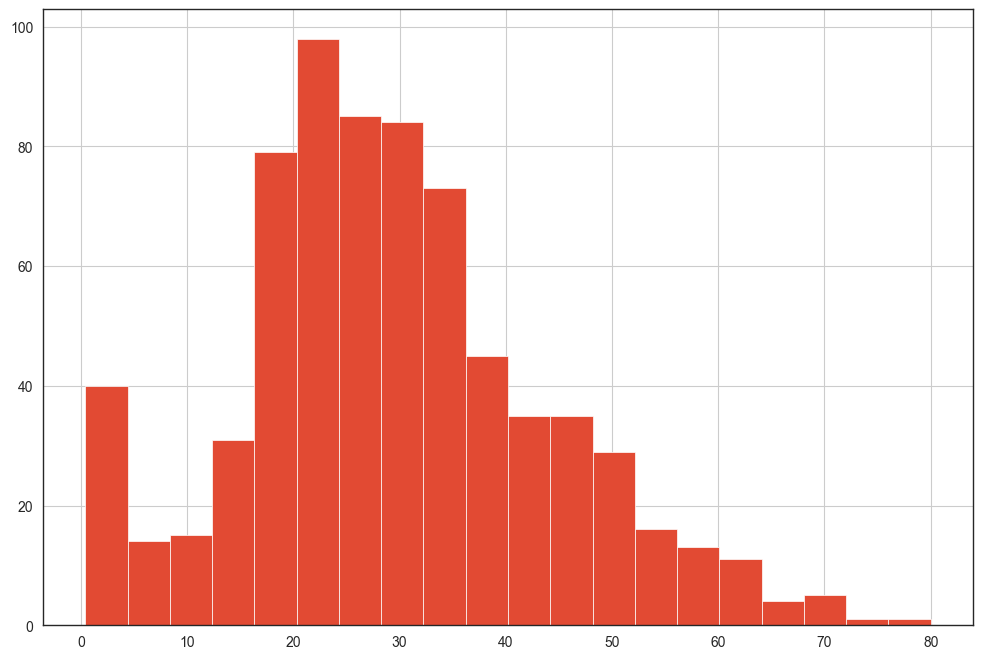

In [4]:
data_raw.Age.hist(bins=20)

In [5]:
print("Train columns with null values:\n", data1.isnull().sum())

print("-" * 10)

print("Test/Validation columns with null values:\n", data_val.isnull().sum())
print("-" * 10)

data_raw.describe(include="all")


Train columns with null values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
----------
Test/Validation columns with null values:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
----------


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [6]:
data_cleaner = [data1, data_val]

for dataset in data_cleaner:
    dataset["Age"] = dataset["Age"].fillna(dataset["Age"].median())
    dataset["Embarked"] = dataset["Embarked"].fillna(dataset["Embarked"].mode()[0])
    dataset["Fare"] = dataset["Fare"].fillna(dataset["Fare"].median())

drop_column = ["PassengerId", "Cabin", "Ticket"]
data1.drop(drop_column, axis=1, inplace=True)

print(data1.isnull().sum())
print("-" * 10)
print(data_val.isnull().sum())

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
----------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


In [7]:
data1.Name.head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [8]:
pd.cut(data1["Age"], 4).value_counts()

Age
(20.315, 40.21]    562
(0.34, 20.315]     179
(40.21, 60.105]    128
(60.105, 80.0]      22
Name: count, dtype: int64

In [9]:
for dataset in data_cleaner:
    dataset["FamilySize"] = dataset["SibSp"] + dataset["Parch"] + 1
    dataset["IsAlone"] = 1  # initialize to yes/1 is alone
    dataset.loc[dataset["FamilySize"] > 1, "IsAlone"] = (
        0  # now update to no/0 if family size is greater than 1
    )

    dataset["Title"] = dataset.Name.str.split(", ", expand=True)[1].str.split(
        ".", expand=True
    )[0]

    dataset["FareBin"] = pd.qcut(dataset["Fare"], 4)
    dataset["AgeBin"] = pd.cut(dataset["Age"].astype(int), 5)


In [10]:
stat_min = 10
title_names = data1["Title"].value_counts() < stat_min
data1["Title"] = data1["Title"].apply(
    lambda x: "Misc" if title_names.loc[x] == True else x
)
print(data1["Title"].value_counts())
print("-" * 10)

data1.info()
data_val.info()
data1.sample(10)

Title
Mr        517
Miss      182
Mrs       125
Master     40
Misc       27
Name: count, dtype: int64
----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Survived    891 non-null    int64   
 1   Pclass      891 non-null    int64   
 2   Name        891 non-null    object  
 3   Sex         891 non-null    object  
 4   Age         891 non-null    float64 
 5   SibSp       891 non-null    int64   
 6   Parch       891 non-null    int64   
 7   Fare        891 non-null    float64 
 8   Embarked    891 non-null    object  
 9   FamilySize  891 non-null    int64   
 10  IsAlone     891 non-null    int64   
 11  Title       891 non-null    object  
 12  FareBin     891 non-null    category
 13  AgeBin      891 non-null    category
dtypes: category(2), float64(2), int64(6), object(4)
memory usage: 85.9+ KB
<class 'pandas.core.frame.DataFram

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title,FareBin,AgeBin
643,1,3,"Foo, Mr. Choong",male,28.0,0,0,56.4958,S,1,1,Mr,"(31.0, 512.329]","(16.0, 32.0]"
560,0,3,"Morrow, Mr. Thomas Rowan",male,28.0,0,0,7.7500,Q,1,1,Mr,"(-0.001, 7.91]","(16.0, 32.0]"
436,0,3,"Ford, Miss. Doolina Margaret ""Daisy""",female,21.0,2,2,34.3750,S,5,0,Miss,"(31.0, 512.329]","(16.0, 32.0]"
185,0,1,"Rood, Mr. Hugh Roscoe",male,28.0,0,0,50.0000,S,1,1,Mr,"(31.0, 512.329]","(16.0, 32.0]"
561,0,3,"Sivic, Mr. Husein",male,40.0,0,0,7.8958,S,1,1,Mr,"(-0.001, 7.91]","(32.0, 48.0]"
513,1,1,"Rothschild, Mrs. Martin (Elizabeth L. Barrett)",female,54.0,1,0,59.4000,C,2,0,Mrs,"(31.0, 512.329]","(48.0, 64.0]"
646,0,3,"Cor, Mr. Liudevit",male,19.0,0,0,7.8958,S,1,1,Mr,"(-0.001, 7.91]","(16.0, 32.0]"
215,1,1,"Newell, Miss. Madeleine",female,31.0,1,0,113.2750,C,2,0,Miss,"(31.0, 512.329]","(16.0, 32.0]"
181,0,2,"Pernot, Mr. Rene",male,28.0,0,0,15.0500,C,1,1,Mr,"(14.454, 31.0]","(16.0, 32.0]"
252,0,1,"Stead, Mr. William Thomas",male,62.0,0,0,26.5500,S,1,1,Mr,"(14.454, 31.0]","(48.0, 64.0]"


In [11]:
data1.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title,FareBin,AgeBin
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,0,Mr,"(-0.001, 7.91]","(16.0, 32.0]"
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,0,Mrs,"(31.0, 512.329]","(32.0, 48.0]"
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,1,Miss,"(7.91, 14.454]","(16.0, 32.0]"
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,0,Mrs,"(31.0, 512.329]","(32.0, 48.0]"
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,1,Mr,"(7.91, 14.454]","(32.0, 48.0]"


In [12]:
label = LabelEncoder()
for dataset in data_cleaner:
    dataset["Sex_Code"] = label.fit_transform(dataset["Sex"])
    dataset["Embarked_Code"] = label.fit_transform(dataset["Embarked"])
    dataset["Title_Code"] = label.fit_transform(dataset["Title"])
    dataset["AgeBin_Code"] = label.fit_transform(dataset["AgeBin"])
    dataset["FareBin_Code"] = label.fit_transform(dataset["FareBin"])

# define y variable aka target/outcome
Target = ["Survived"]

# define x variables for original features aka feature selection
data1_x = [
    "Sex",
    "Pclass",
    "Embarked",
    "Title",
    "SibSp",
    "Parch",
    "Age",
    "Fare",
    "FamilySize",
    "IsAlone",
]  # pretty name/values for charts
data1_x_calc = [
    "Sex_Code",
    "Pclass",
    "Embarked_Code",
    "Title_Code",
    "SibSp",
    "Parch",
    "Age",
    "Fare",
]  # coded for algorithm calculation
data1_xy = Target + data1_x
print("Original X Y: ", data1_xy, "\n")


# define x variables for original w/bin features to remove continuous variables
data1_x_bin = [
    "Sex_Code",
    "Pclass",
    "Embarked_Code",
    "Title_Code",
    "FamilySize",
    "AgeBin_Code",
    "FareBin_Code",
]
data1_xy_bin = Target + data1_x_bin
print("Bin X Y: ", data1_xy_bin, "\n")


# define x and y variables for dummy features original
data1_dummy = pd.get_dummies(data1[data1_x])
data1_x_dummy = data1_dummy.columns.tolist()
data1_xy_dummy = Target + data1_x_dummy
print("Dummy X Y: ", data1_xy_dummy, "\n")


data1_dummy.head()


Original X Y:  ['Survived', 'Sex', 'Pclass', 'Embarked', 'Title', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone'] 

Bin X Y:  ['Survived', 'Sex_Code', 'Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code'] 

Dummy X Y:  ['Survived', 'Pclass', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_Master', 'Title_Misc', 'Title_Miss', 'Title_Mr', 'Title_Mrs'] 



,Pclass,SibSp,Parch,Age,Fare,FamilySize,IsAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Misc,Title_Miss,Title_Mr,Title_Mrs
0,3,1,0,22.0,7.2500,2,0,False,True,False,False,True,False,False,False,True,False
1,1,1,0,38.0,71.2833,2,0,True,False,True,False,False,False,False,False,False,True
2,3,0,0,26.0,7.9250,1,1,True,False,False,False,True,False,False,True,False,False
3,1,1,0,35.0,53.1000,2,0,True,False,False,False,True,False,False,False,False,True
4,3,0,0,35.0,8.0500,1,1,False,True,False,False,True,False,False,False,True,False


In [13]:
print("Train columns with null values:\n", data1.isnull().sum())
print("-" * 10)
print(data1.info())
print("-" * 10)

print("Test/Validation columns with null values:\n", data_val.isnull().sum())
print("-" * 10)
print(data_val.info())
print("-" * 10)

data_raw.describe(include="all")

Train columns with null values:
 Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
FamilySize       0
IsAlone          0
Title            0
FareBin          0
AgeBin           0
Sex_Code         0
Embarked_Code    0
Title_Code       0
AgeBin_Code      0
FareBin_Code     0
dtype: int64
----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Survived       891 non-null    int64   
 1   Pclass         891 non-null    int64   
 2   Name           891 non-null    object  
 3   Sex            891 non-null    object  
 4   Age            891 non-null    float64 
 5   SibSp          891 non-null    int64   
 6   Parch          891 non-null    int64   
 7   Fare           891 non-null    float64 
 8   Embarked       891 non

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [14]:
data1.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title,FareBin,AgeBin,Sex_Code,Embarked_Code,Title_Code,AgeBin_Code,FareBin_Code
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,0,Mr,"(-0.001, 7.91]","(16.0, 32.0]",1,2,3,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,0,Mrs,"(31.0, 512.329]","(32.0, 48.0]",0,0,4,2,3
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,1,Miss,"(7.91, 14.454]","(16.0, 32.0]",0,2,2,1,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,0,Mrs,"(31.0, 512.329]","(32.0, 48.0]",0,2,4,2,3
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,1,Mr,"(7.91, 14.454]","(32.0, 48.0]",1,2,3,2,1


In [15]:
train1_x, test1_x, train1_y, test1_y = model_selection.train_test_split(
    data1[data1_x_calc], data1[Target], random_state=0
)
train1_x_bin, test1_x_bin, train1_y_bin, test1_y_bin = model_selection.train_test_split(
    data1[data1_x_bin], data1[Target], random_state=0
)
train1_x_dummy, test1_x_dummy, train1_y_dummy, test1_y_dummy = (
    model_selection.train_test_split(
        data1_dummy[data1_x_dummy], data1[Target], random_state=0
    )
)

print("Data1 Shape: {}".format(data1.shape))
print("Train1 Shape: {}".format(train1_x.shape))
print("Test1 Shape: {}".format(test1_x.shape))

train1_x_bin.head()

Data1 Shape: (891, 19)
Train1 Shape: (668, 8)
Test1 Shape: (223, 8)


,Sex_Code,Pclass,Embarked_Code,Title_Code,FamilySize,AgeBin_Code,FareBin_Code
105,1,3,2,3,1,1,0
68,0,3,2,2,7,1,1
253,1,3,2,3,2,1,2
320,1,3,2,3,1,1,0
706,0,2,2,4,1,2,1


In [16]:
for x in data1_x:
    if data1[x].dtype != "float64":
        print("Survival Correlation by :", x)
        print(data1[[x, Target[0]]].groupby(x, as_index=False).mean())
        print("-" * 10, "\n")


Survival Correlation by : Sex
      Sex  Survived
0  female  0.742038
1    male  0.188908
---------- 

Survival Correlation by : Pclass
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
---------- 

Survival Correlation by : Embarked
  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009
---------- 

Survival Correlation by : Title
    Title  Survived
0  Master  0.575000
1    Misc  0.444444
2    Miss  0.697802
3      Mr  0.156673
4     Mrs  0.792000
---------- 

Survival Correlation by : SibSp
   SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000
---------- 

Survival Correlation by : Parch
   Parch  Survived
0      0  0.343658
1      1  0.550847
2      2  0.500000
3      3  0.600000
4      4  0.000000
5      5  0.200000
6      6  0.000000
---------- 

Survival Correlation by : FamilySize
   FamilySize  Survived
0           1  0.30

In [17]:
print(pd.crosstab(data1["Title"], data1[Target[0]]))

Survived    0    1
Title             
Master     17   23
Misc       15   12
Miss       55  127
Mr        436   81
Mrs        26   99


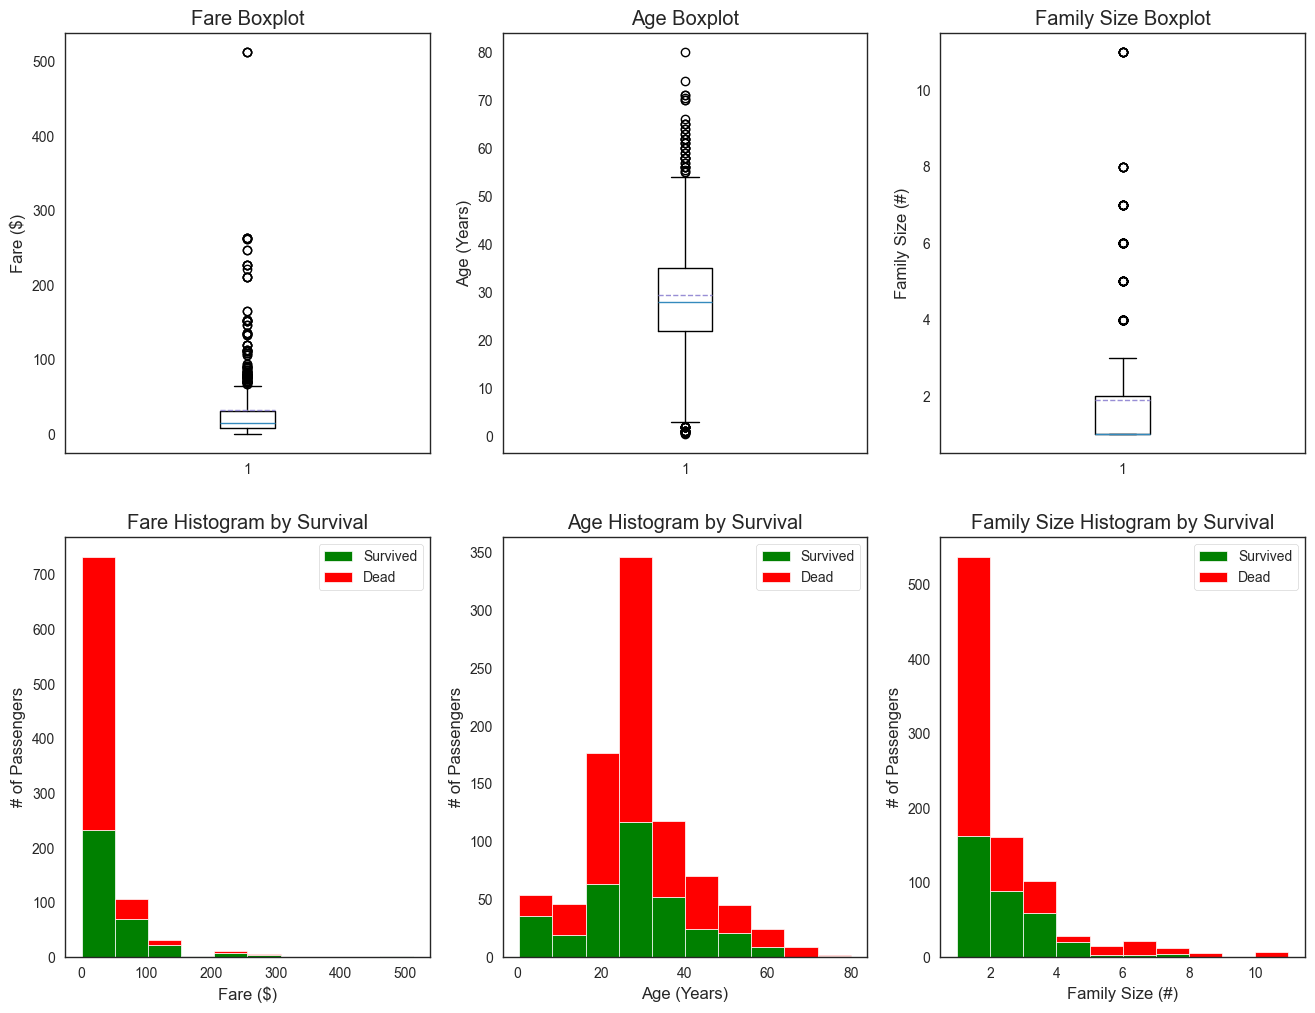

In [18]:
plt.figure(figsize=(16, 12))

plt.subplot(231)
plt.boxplot(x=data1["Fare"], showmeans=True, meanline=True)
plt.title("Fare Boxplot")
plt.ylabel("Fare ($)")

plt.subplot(232)
plt.boxplot(x=data1["Age"], showmeans=True, meanline=True)
plt.title("Age Boxplot")
plt.ylabel("Age (Years)")

plt.subplot(233)
plt.boxplot(x=data1["FamilySize"], showmeans=True, meanline=True)
plt.title("Family Size Boxplot")
plt.ylabel("Family Size (#)")

plt.subplot(234)
plt.hist(
    x=[data1[data1["Survived"] == 1]["Fare"], data1[data1["Survived"] == 0]["Fare"]],
    stacked=True,
    color=["g", "r"],
    label=["Survived", "Dead"],
)
plt.title("Fare Histogram by Survival")
plt.xlabel("Fare ($)")
plt.ylabel("# of Passengers")
plt.legend()

plt.subplot(235)
plt.hist(
    x=[data1[data1["Survived"] == 1]["Age"], data1[data1["Survived"] == 0]["Age"]],
    stacked=True,
    color=["g", "r"],
    label=["Survived", "Dead"],
)
plt.title("Age Histogram by Survival")
plt.xlabel("Age (Years)")
plt.ylabel("# of Passengers")
plt.legend()

plt.subplot(236)
plt.hist(
    x=[
        data1[data1["Survived"] == 1]["FamilySize"],
        data1[data1["Survived"] == 0]["FamilySize"],
    ],
    stacked=True,
    color=["g", "r"],
    label=["Survived", "Dead"],
)
plt.title("Family Size Histogram by Survival")
plt.xlabel("Family Size (#)")
plt.ylabel("# of Passengers")
plt.legend()

<Axes: xlabel='FamilySize', ylabel='Survived'>

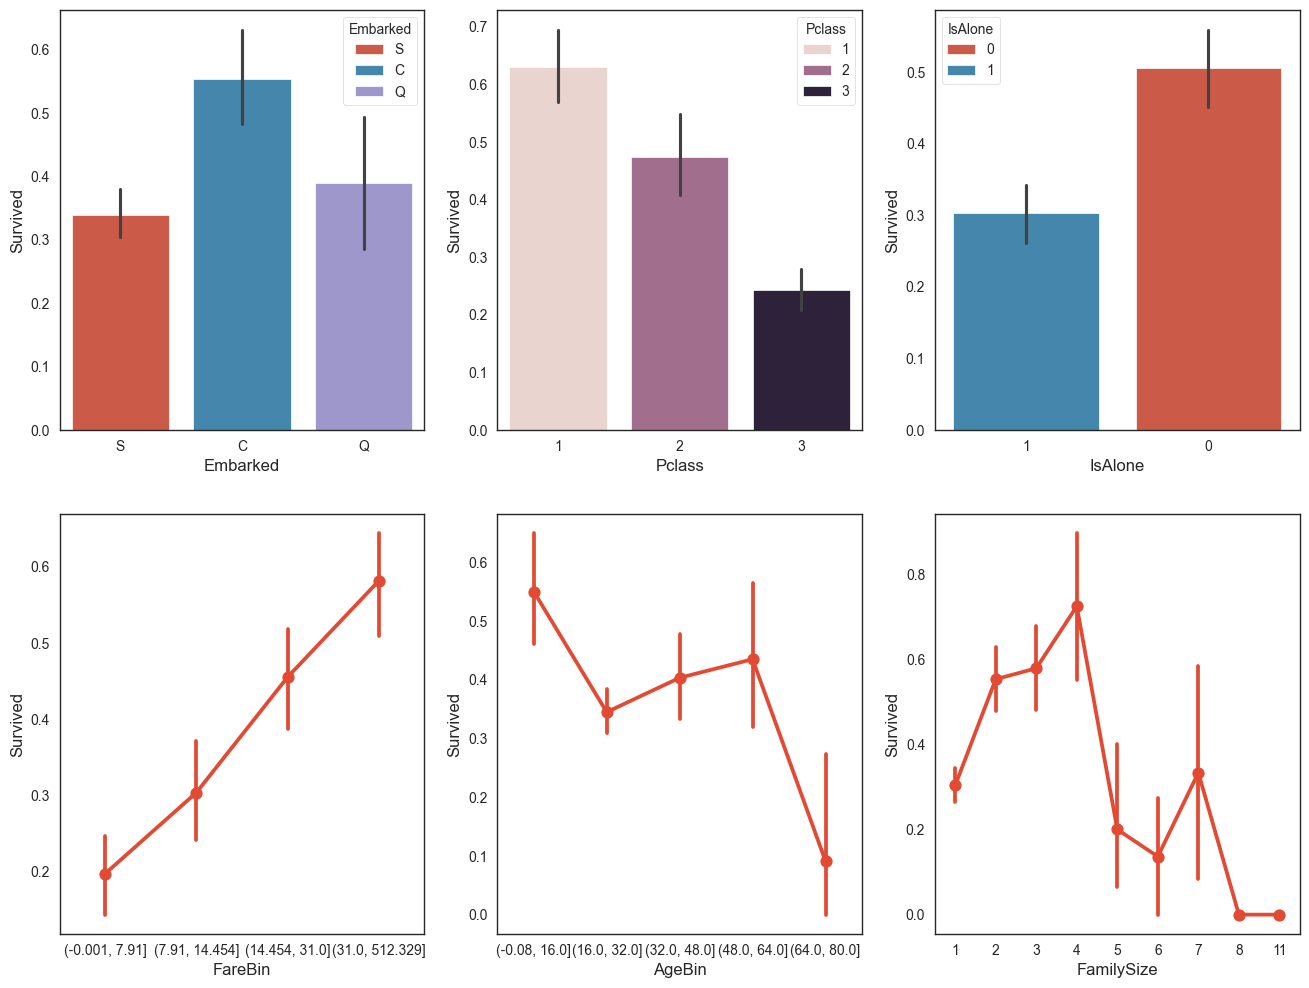

In [19]:
fig, saxis = plt.subplots(2, 3, figsize=(16, 12))
sns.barplot(
    x="Embarked", y="Survived", data=data1, ax=saxis[0, 0], hue="Embarked", legend=True
)
sns.barplot(x="Pclass", y="Survived", data=data1, ax=saxis[0, 1], hue="Pclass")
sns.barplot(
    x="IsAlone", y="Survived", data=data1, ax=saxis[0, 2], order=[1, 0], hue="IsAlone"
)

sns.pointplot(x="FareBin", y="Survived", data=data1, ax=saxis[1, 0], legend=True)
sns.pointplot(x="AgeBin", y="Survived", data=data1, ax=saxis[1, 1], legend=True)
sns.pointplot(x="FamilySize", y="Survived", data=data1, ax=saxis[1, 2], legend=True)

Text(0.5, 1.0, 'Pclass vs Family Size Survival Comparison')

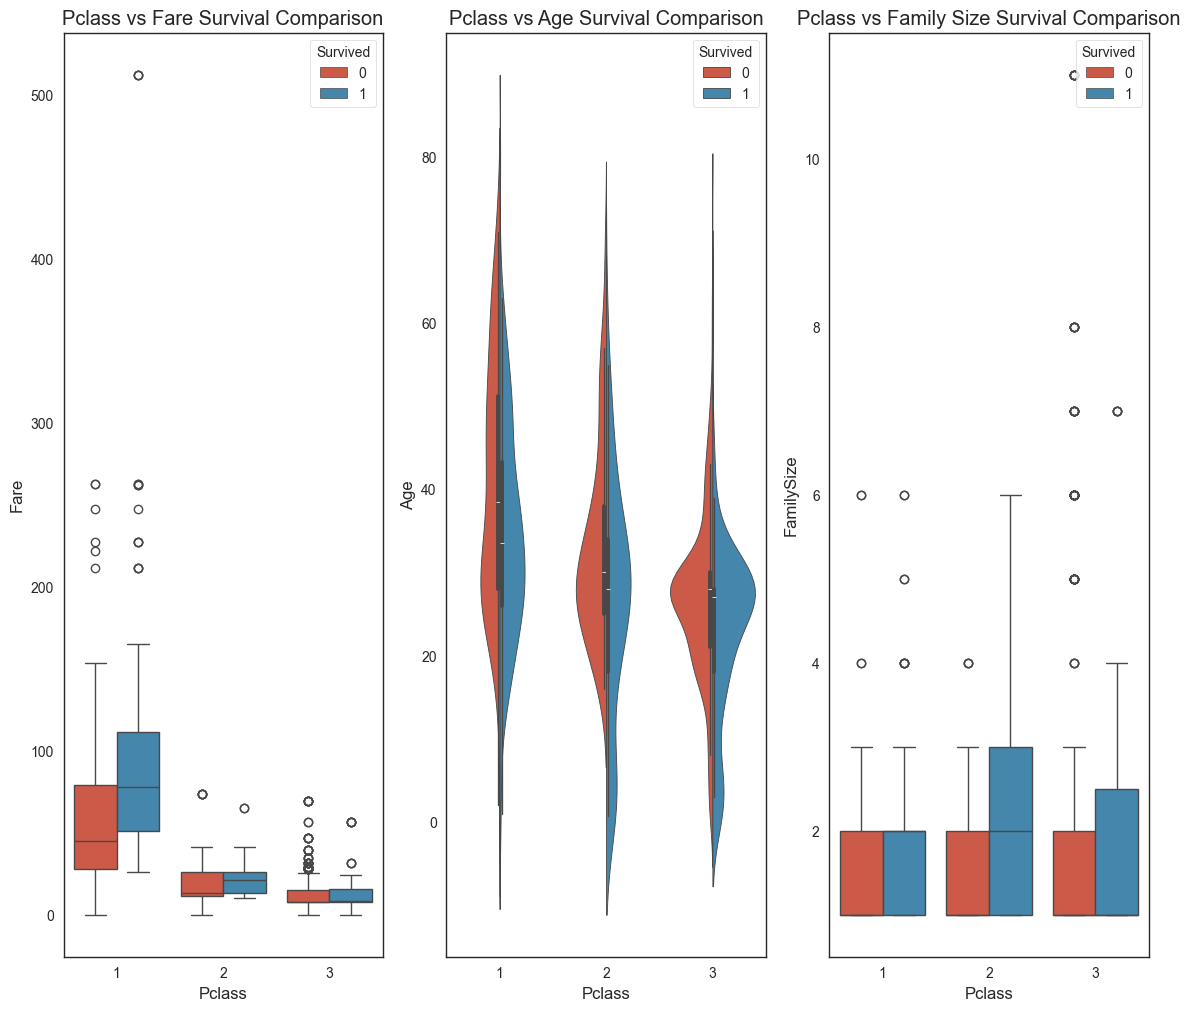

In [20]:
fig, (axis1, axis2, axis3) = plt.subplots(1, 3, figsize=(14, 12))

sns.boxplot(x="Pclass", y="Fare", hue="Survived", data=data1, ax=axis1)
axis1.set_title("Pclass vs Fare Survival Comparison")

sns.violinplot(x="Pclass", y="Age", hue="Survived", data=data1, split=True, ax=axis2)
axis2.set_title("Pclass vs Age Survival Comparison")

sns.boxplot(x="Pclass", y="FamilySize", hue="Survived", data=data1, ax=axis3)
axis3.set_title("Pclass vs Family Size Survival Comparison")


Text(0.5, 1.0, 'Sex vs IsAlone Survival Comparison')

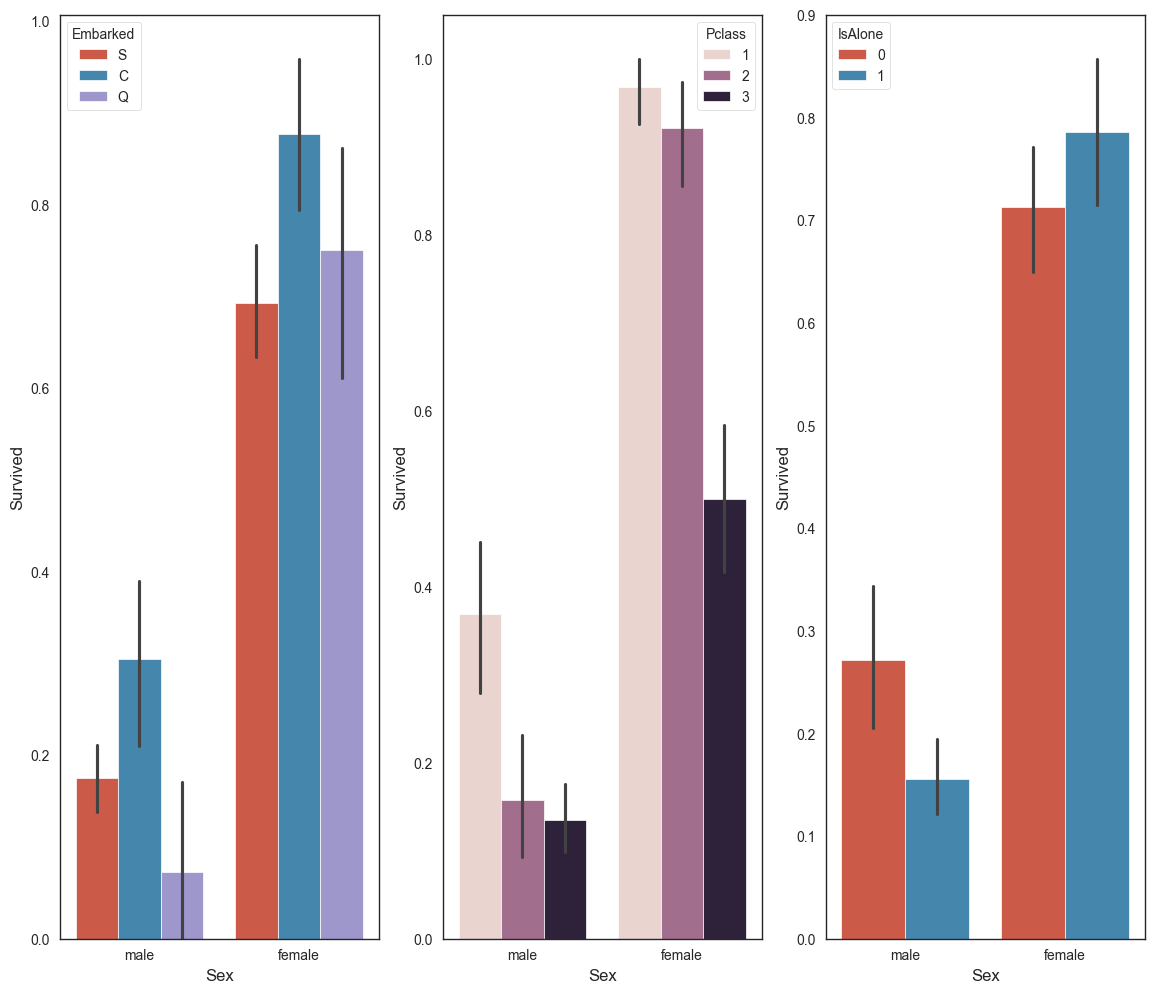

In [21]:
fig, qaxis = plt.subplots(1, 3, figsize=(14, 12))

sns.barplot(x="Sex", y="Survived", hue="Embarked", data=data1, ax=qaxis[0])
axis1.set_title("Sex vs Embarked Survival Comparison")

sns.barplot(x="Sex", y="Survived", hue="Pclass", data=data1, ax=qaxis[1])
axis1.set_title("Sex vs Pclass Survival Comparison")

sns.barplot(x="Sex", y="Survived", hue="IsAlone", data=data1, ax=qaxis[2])
axis1.set_title("Sex vs IsAlone Survival Comparison")

<Axes: xlabel='Pclass', ylabel='Survived'>

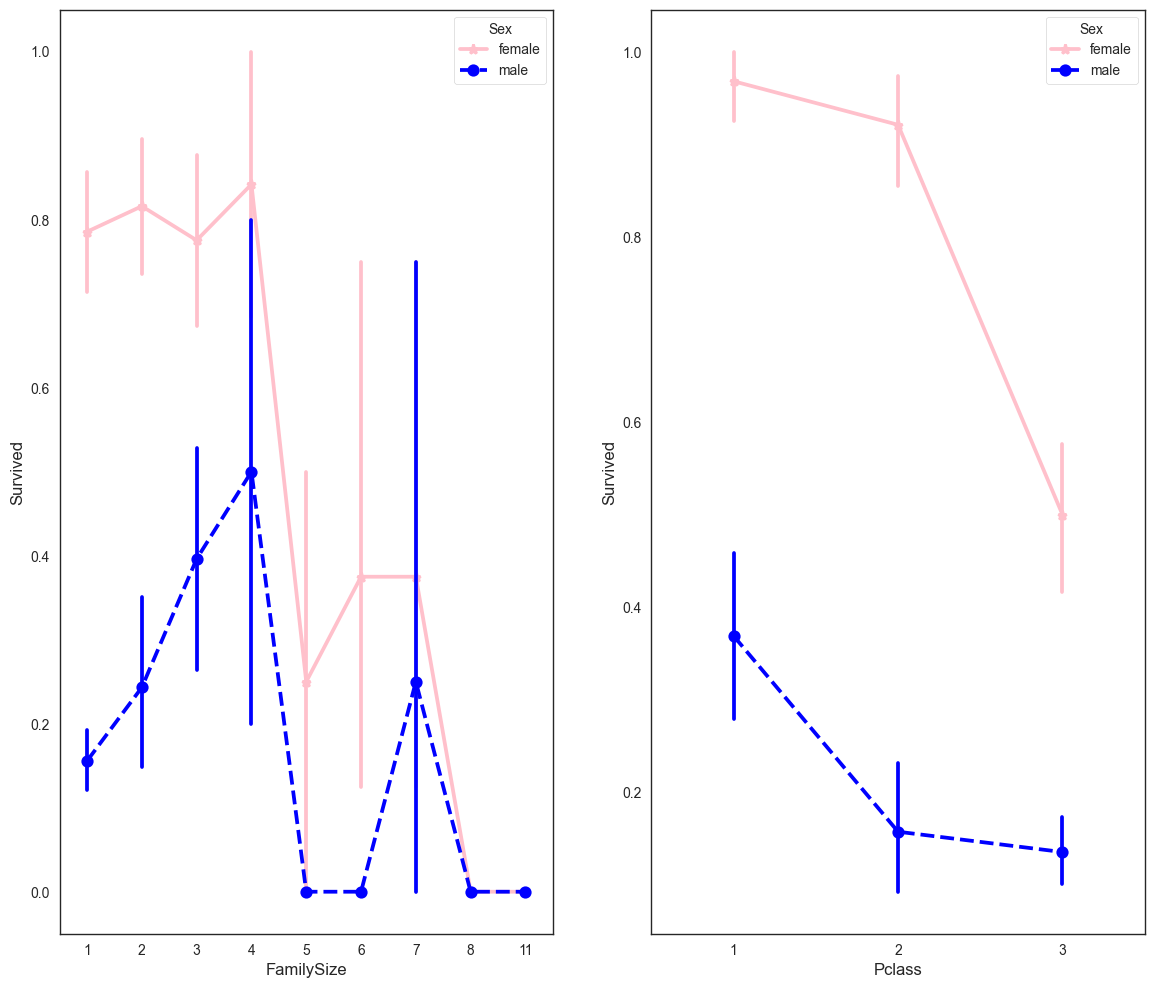

In [22]:
fig, (maxis1, maxis2) = plt.subplots(1, 2, figsize=(14, 12))

sns.pointplot(
    x="FamilySize",
    y="Survived",
    hue="Sex",
    data=data1,
    palette={"male": "blue", "female": "pink"},
    markers=["*", "o"],
    linestyles=["-", "--"],
    ax=maxis1,
)

sns.pointplot(
    x="Pclass",
    y="Survived",
    hue="Sex",
    data=data1,
    palette={"male": "blue", "female": "pink"},
    markers=["*", "o"],
    linestyles=["-", "--"],
    ax=maxis2,
)

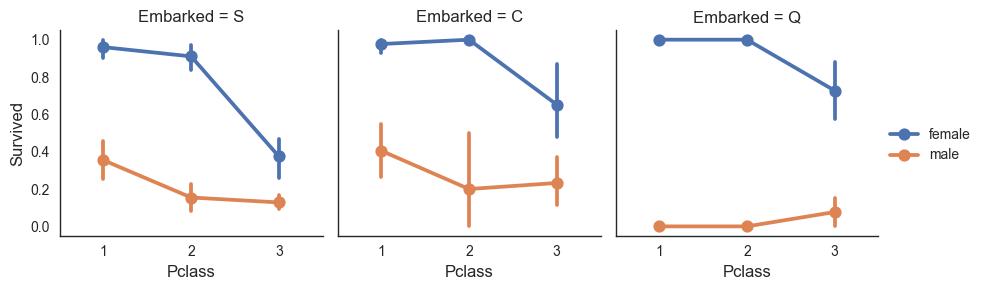

In [23]:
e = sns.FacetGrid(data1, col="Embarked")
e.map(
    sns.pointplot,
    "Pclass",
    "Survived",
    "Sex",
    errorbar=("ci", 95.0),
    palette="deep",
    order=[1, 2, 3],
    hue_order=["female", "male"],
)
e.add_legend()

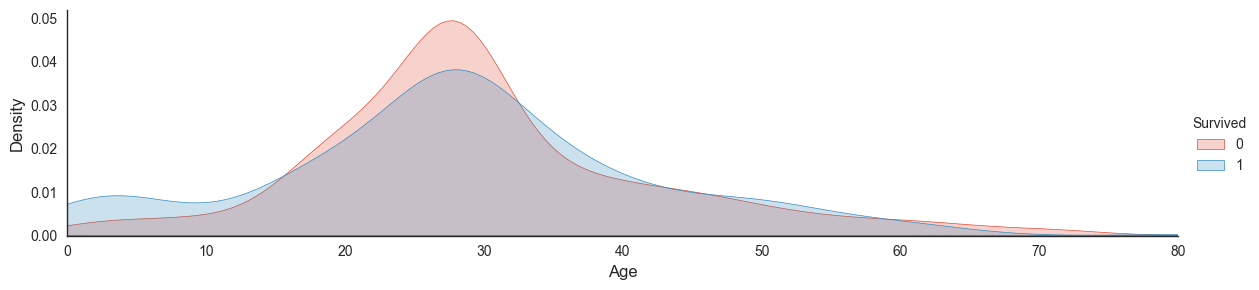

In [24]:
a = sns.FacetGrid(data1, hue="Survived", aspect=4)
a.map(sns.kdeplot, "Age", fill=True)
a.set(xlim=(0, data1["Age"].max()))
a.add_legend()

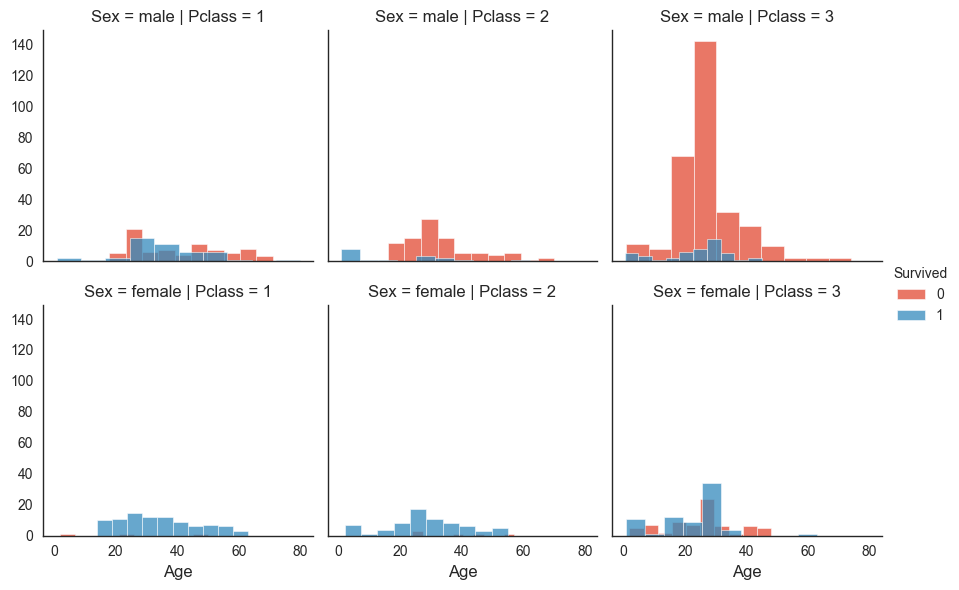

In [25]:
h = sns.FacetGrid(data1, row="Sex", col="Pclass", hue="Survived")
h.map(plt.hist, "Age", alpha=0.75)
h.add_legend()

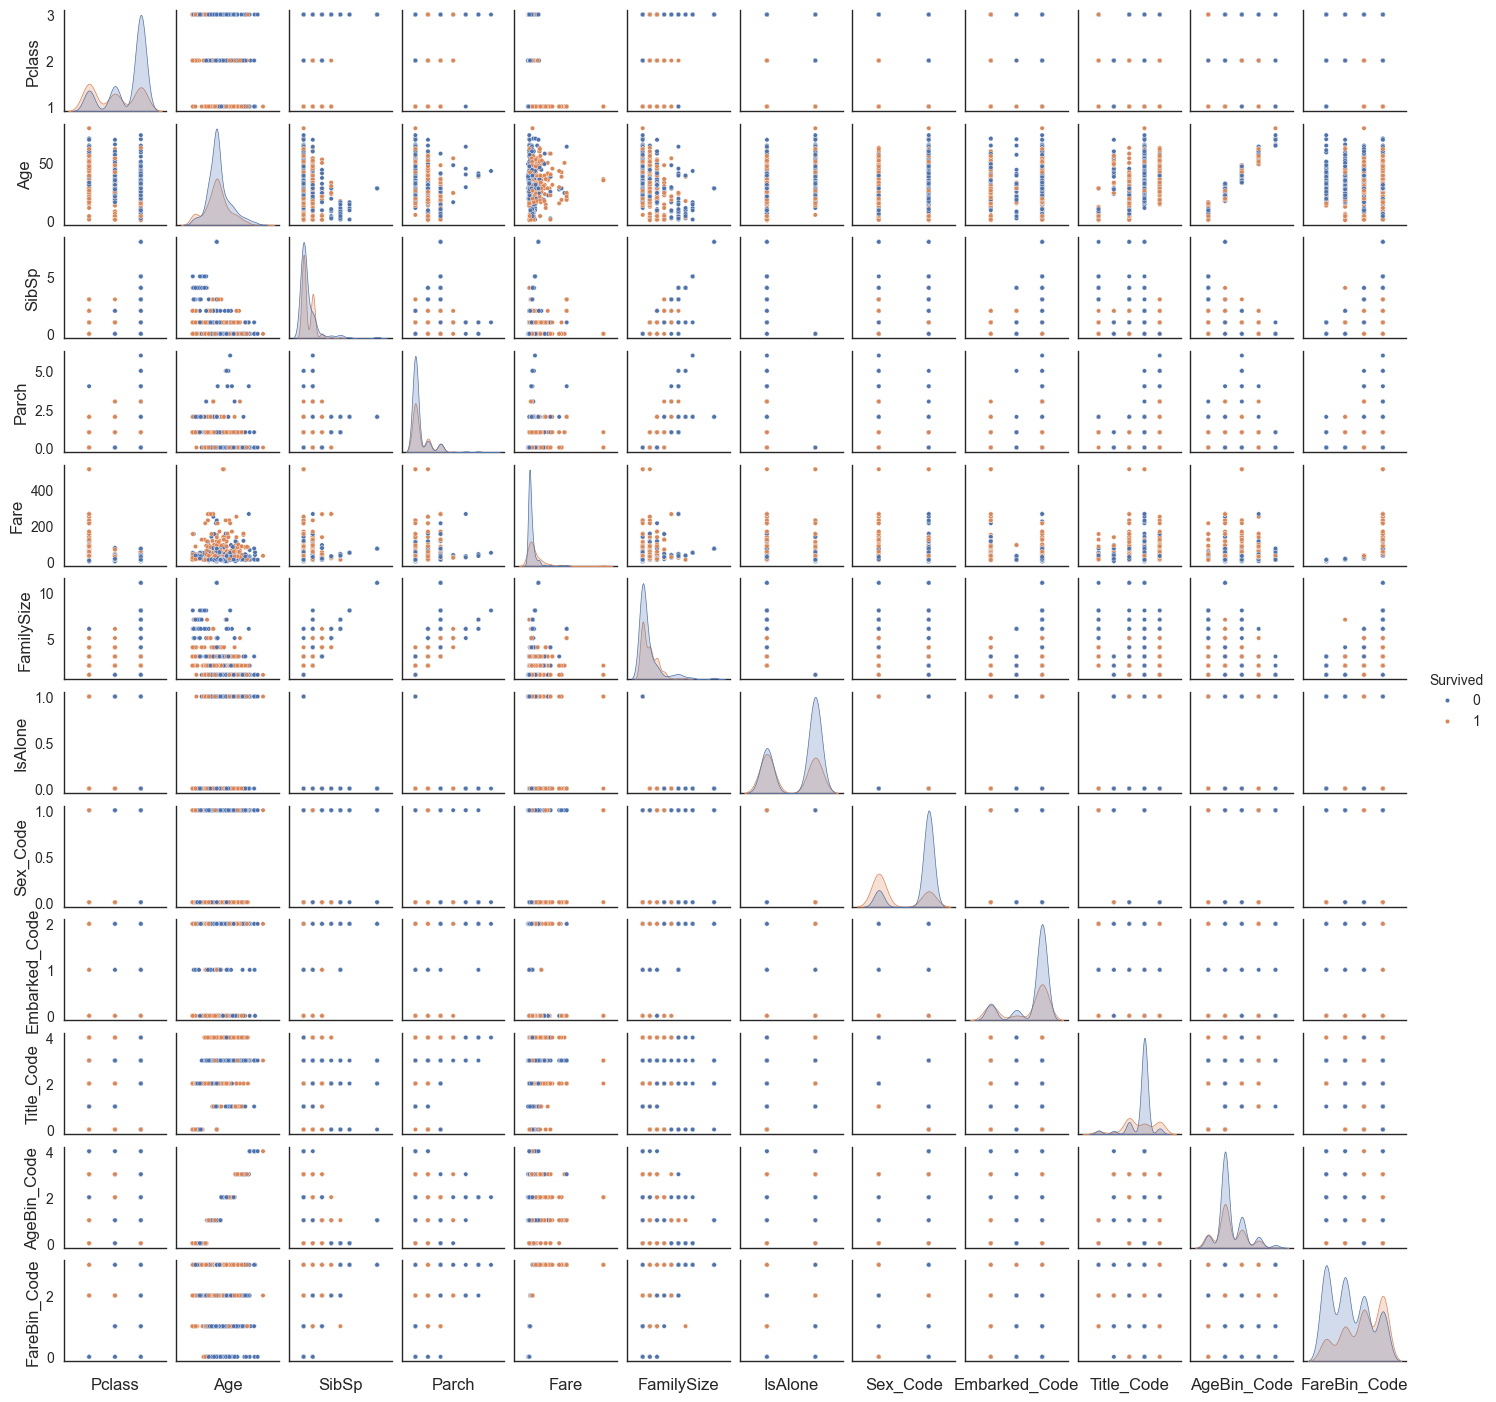

In [26]:
pp = sns.pairplot(data1, hue="Survived", palette="deep", height = 1.2, diag_kind="kde", diag_kws=dict(fill=True), plot_kws=dict(s = 10))
pp.set(xticklabels=[])

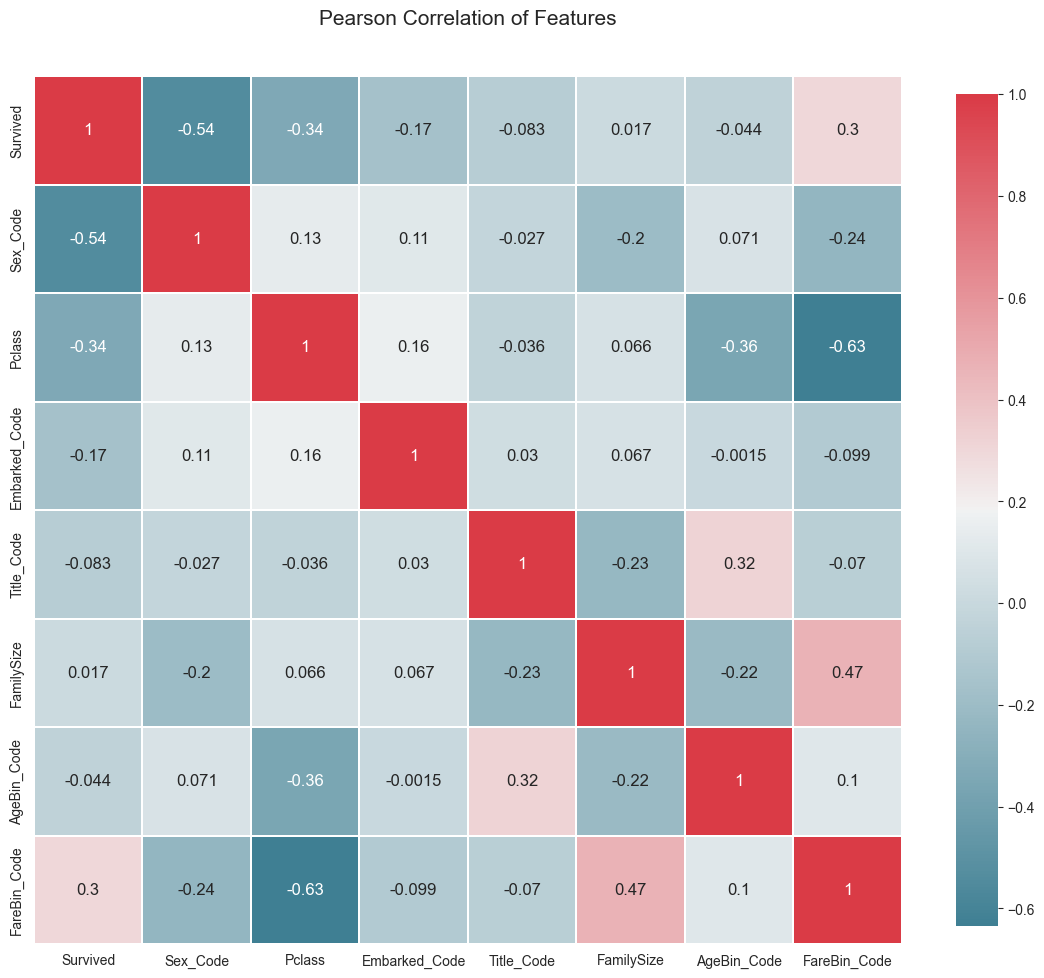

In [27]:
def correlation_heatmap(df):
    _, ax = plt.subplots(figsize=(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap=True)
    
    _ = sns.heatmap(
        df.corr(),
        cmap=colormap,
        square=True,
        cbar_kws={"shrink": 0.9},
        ax=ax,
        annot=True,
        linewidths=0.1, vmax=1.0, linecolor="white",
        annot_kws={"fontsize": 12},
    )

    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(data1[data1_xy_bin])


In [28]:
MLA = [
    # Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),
    # Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    # GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    #Naive Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    # Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    #SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    # Trees
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    # Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),
    #xgboost
    XGBClassifier(),

]

cv_split = model_selection.ShuffleSplit(n_splits=10, test_size=0.30, train_size=0.6, random_state=0)

MLA_columns = ["MLA Name", "MLA Parameters", "MLA Train Accuracy Mean", "MLA Test Accuracy Mean","MLA Test Accuracy 3*STD",  "MLA Time"]
MLA_compare = pd.DataFrame(columns=MLA_columns)


MLA_predict = pd.DataFrame(index= data1.index)

row_index = 0
for alg in MLA:
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, "MLA Name"] = MLA_name
    MLA_compare.loc[row_index, "MLA Parameters"] = str(alg.get_params())
    cv_results = model_selection.cross_validate(alg, data1[data1_x_bin], data1[Target].values.ravel(), cv=cv_split, return_train_score=True)
    MLA_compare.loc[row_index, "MLA Time"] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, "MLA Train Accuracy Mean"] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, "MLA Test Accuracy Mean"] = cv_results['test_score'].mean()
    MLA_compare.loc[row_index, "MLA Test Accuracy 3*STD"] = cv_results['test_score'].std() * 3
    alg.fit(data1[data1_x_bin], data1[Target].values.ravel())
    MLA_predict[MLA_name] = alg.predict(data1[data1_x_bin])
    row_index += 1

MLA_compare.sort_values(by=['MLA Test Accuracy Mean'], ascending=False, inplace=True)
MLA_compare

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time
14,SVC,"{'C': 1.0, 'break_ties': False, 'cache_size': ...",0.835206,0.827612,0.040916,0.067859
4,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.895131,0.826493,0.063963,0.086001
21,XGBClassifier,"{'objective': 'binary:logistic', 'base_score':...",0.891199,0.826119,0.053964,0.131386
15,NuSVC,"{'break_ties': False, 'cache_size': 200, 'clas...",0.834082,0.826119,0.045663,0.087051
1,BaggingClassifier,"{'bootstrap': True, 'bootstrap_features': Fals...",0.890824,0.825373,0.065233,0.014579
2,ExtraTreesClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",0.895131,0.823507,0.058606,0.067723
3,GradientBoostingClassifier,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...",0.866667,0.822761,0.049873,0.064836
17,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.895131,0.822388,0.05534,0.001324
0,AdaBoostClassifier,"{'algorithm': 'deprecated', 'estimator': None,...",0.830712,0.820522,0.064587,0.04466
18,ExtraTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.895131,0.815299,0.074126,0.001157


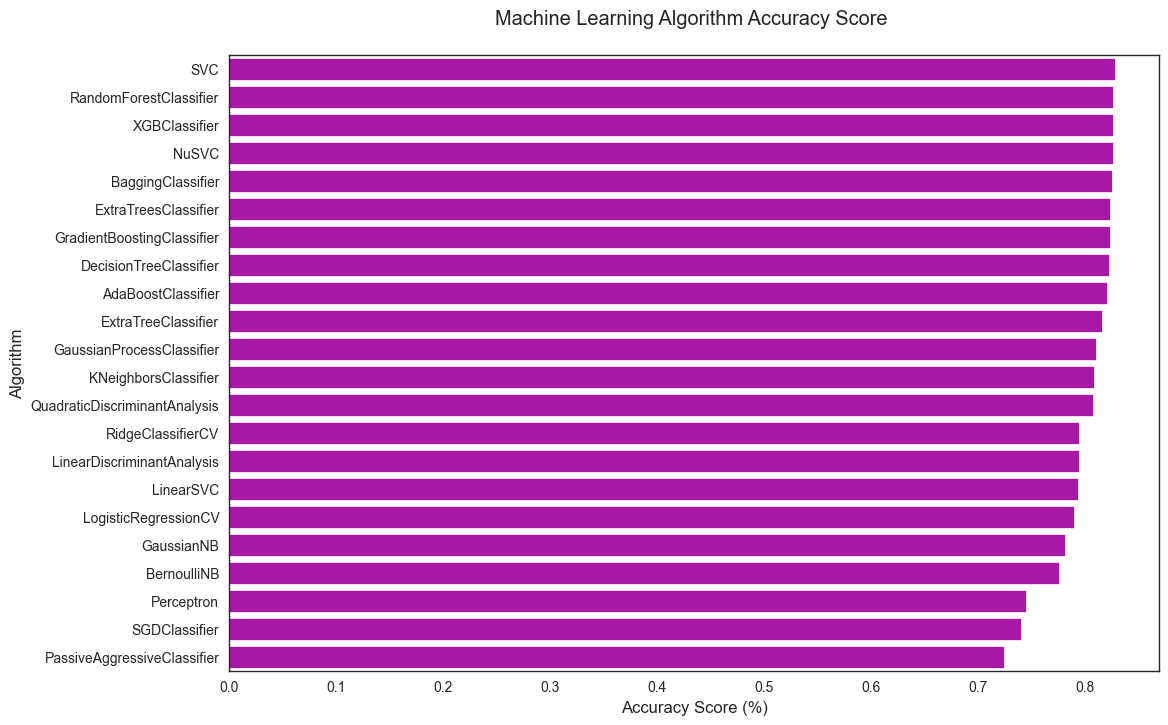

In [29]:
sns.barplot(x='MLA Test Accuracy Mean', y='MLA Name', data=MLA_compare, color = 'm')
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')
plt.show()

In [30]:
data1.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title,FareBin,AgeBin,Sex_Code,Embarked_Code,Title_Code,AgeBin_Code,FareBin_Code
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,0,Mr,"(-0.001, 7.91]","(16.0, 32.0]",1,2,3,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,0,Mrs,"(31.0, 512.329]","(32.0, 48.0]",0,0,4,2,3
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,1,Miss,"(7.91, 14.454]","(16.0, 32.0]",0,2,2,1,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,0,Mrs,"(31.0, 512.329]","(32.0, 48.0]",0,2,4,2,3
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,1,Mr,"(7.91, 14.454]","(32.0, 48.0]",1,2,3,2,1


In [31]:
# Create a random prediction for fun (not for production use) 
predictions = []
for x in range(len(data1)):
    if random.random() > 0.5:
        predictions.append(1)
    else:
        predictions.append(0)
data1["Random_Predict"] = predictions
# data1.dtypes

data1['Random_Score'] = 0
data1.loc[(data1['Survived'] == data1['Random_Predict']), 'Random_Score'] = 1

print('Coin Flip Model Accuracy: {:.2f}%'.format(data1['Random_Score'].mean()*100))

print('Coin Flip Model Accuracy w/Scikit: {:.2f}%'.format(metrics.accuracy_score(data1['Survived'], data1['Random_Predict'])*100))


Coin Flip Model Accuracy: 50.62%
Coin Flip Model Accuracy w/Scikit: 50.62%


In [32]:
pivot_female = (
    data1[data1.Sex == "female"]
    .groupby(["Sex", "Pclass", "Embarked", "FareBin"])["Survived"]
    .mean()
)
print("Survival Decision Tree w/Female Node: \n", pivot_female)

pivot_male = data1[data1.Sex == "male"].groupby(["Sex", "Title"])["Survived"].mean()
print("Survival Decision Tree w/Male Node: \n", pivot_male)

Survival Decision Tree w/Female Node: 
 Sex     Pclass  Embarked  FareBin        
female  1       C         (-0.001, 7.91]          NaN
                          (7.91, 14.454]          NaN
                          (14.454, 31.0]     0.666667
                          (31.0, 512.329]    1.000000
                Q         (-0.001, 7.91]          NaN
                          (7.91, 14.454]          NaN
                          (14.454, 31.0]          NaN
                          (31.0, 512.329]    1.000000
                S         (-0.001, 7.91]          NaN
                          (7.91, 14.454]          NaN
                          (14.454, 31.0]     1.000000
                          (31.0, 512.329]    0.955556
        2       C         (-0.001, 7.91]          NaN
                          (7.91, 14.454]     1.000000
                          (14.454, 31.0]     1.000000
                          (31.0, 512.329]    1.000000
                Q         (-0.001, 7.91]          NaN


/tmp/ipykernel_2027/878870437.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["Sex", "Pclass", "Embarked", "FareBin"])["Survived"]


In [33]:
def mytree(df):
    Model = pd.DataFrame(data={"Predict": []})
    male_title = ["Master"]

    for index, row in df.iterrows():
        Model.loc[index, "Predict"] = 0

        if df.loc[index, "Sex"] == "female":
            Model.loc[index, "Predict"] = 1

        if (
            (df.loc[index, "Sex"] == "female")
            & (df.loc[index, "Pclass"] == 3)
            & (df.loc[index, "Embarked"] == "S")
            & (df.loc[index, "Fare"] > 8)
        ):
            Model.loc[index, "Predict"] = 0
        if (df.loc[index, "Sex"] == "male") & (df.loc[index, "Title"] in male_title):
            Model.loc[index, "Predict"] = 1
    return Model


Tree_Predict = mytree(data1)
print(
    "Decision Tree Model Accuracy/Precision Score: {:.2f}%".format(
        metrics.accuracy_score(data1["Survived"], Tree_Predict) * 100
    )
)

print(metrics.classification_report(data1["Survived"], Tree_Predict))

Decision Tree Model Accuracy/Precision Score: 82.04%
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       549
           1       0.82      0.68      0.75       342

    accuracy                           0.82       891
   macro avg       0.82      0.79      0.80       891
weighted avg       0.82      0.82      0.82       891



Confusion matrix, without normalization
[[497  52]
 [108 234]]
Normalized confusion matrix
[[0.91 0.09]
 [0.32 0.68]]


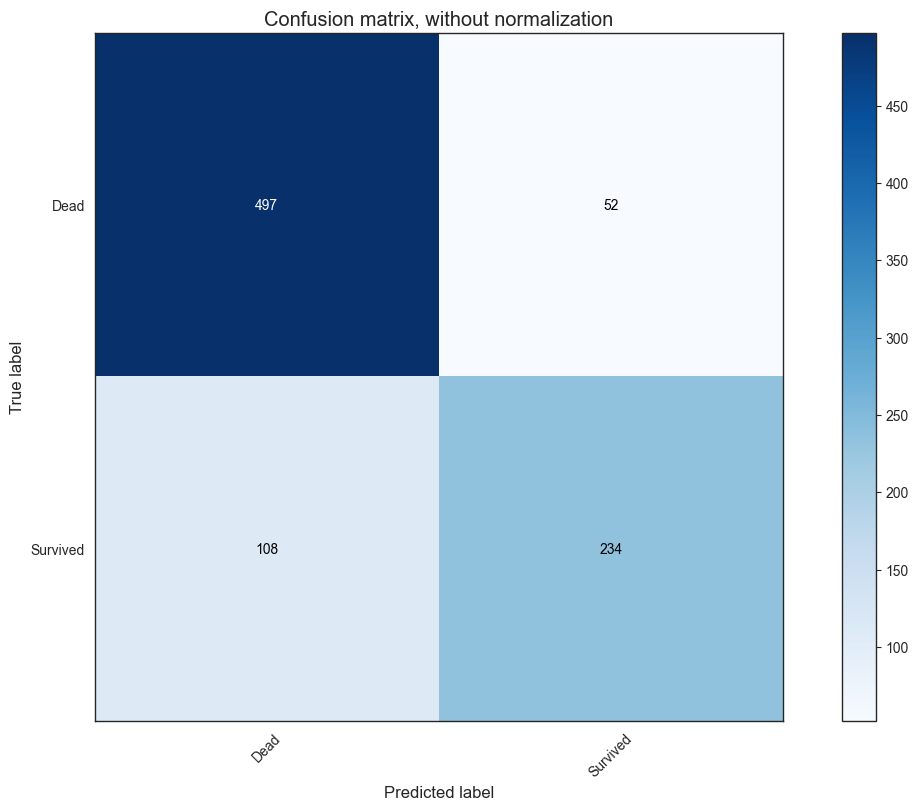

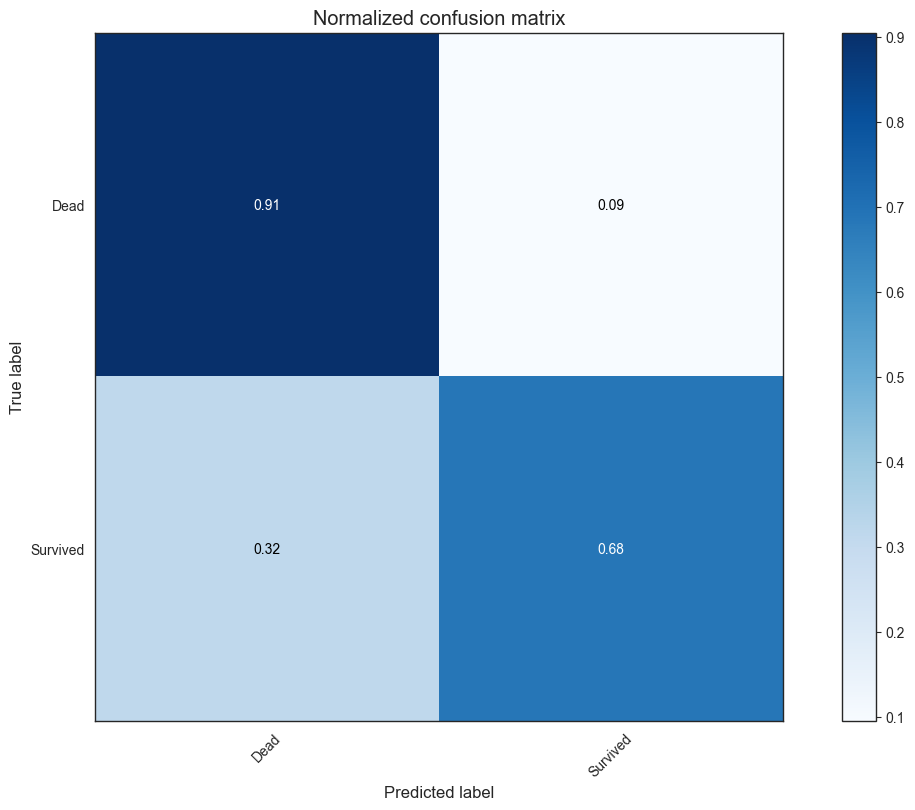

In [47]:
import itertools


def plot_confusion_matrix(
    cm, classes, normalize=False, title="Confusion matrix", cmap=plt.cm.Blues
):
    if normalize:
        cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")

    print(cm)

    plt.imshow(cm, interpolation="nearest", cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = ".2f" if normalize else "d"
    thresh = cm.max() / 2.0
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(
            j,
            i,
            format(cm[i, j], fmt),
            ha="center",
            va="center",
            color="white" if cm[i, j] > thresh else "black",
        )
    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel("Predicted label")


cnf_matrix = metrics.confusion_matrix(data1["Survived"], Tree_Predict)
np.set_printoptions(precision=2)

class_names = ["Dead", "Survived"]

plt.figure()
plot_confusion_matrix(
    cnf_matrix,
    classes=class_names,
    normalize=False,
    title="Confusion matrix, without normalization",
)

plt.figure()
plot_confusion_matrix(
    cnf_matrix,
    classes=class_names,
    normalize=True,
    title="Normalized confusion matrix",
)
plt.show()

In [45]:
cnf_matrix = metrics.confusion_matrix(data1['Survived'], Tree_Predict)
display.display(cnf_matrix.astype('float'))
display.display(cnf_matrix.sum(axis=1)[:, np.newaxis])
cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]

array([[497.,  52.],
       [108., 234.]])

array([[549],
       [342]])

array([[0.90528233, 0.09471767],
       [0.31578947, 0.68421053]])

In [50]:
dtree = tree.DecisionTreeClassifier(random_state=0)
base_results = model_selection.cross_validate(
    dtree,
    data1[data1_x_bin],
    data1[Target].values.ravel(),
    cv=cv_split,
    return_train_score=True,
)
dtree.fit(data1[data1_x_bin], data1[Target].values.ravel())

print("BEFORE DT Parameters: ", dtree.get_params())
print(
    "BEFORE DT Training w/bin scrore mean: {:.2f}".format(
        base_results["train_score"].mean() * 100
    )
)
print(
    "BEFORE DT Test w/bin score mean: {:.2f}".format(
        base_results["test_score"].mean() * 100
    )
)
print(
    "BEFORE DT Test w/bin score 3*STD: +/-{:.2f}".format(
        base_results["test_score"].std() * 3 * 100
    )
)
print("-" * 10)

param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [2, 4, 6, 8, 10, None],
    "random_state": [0],
}

tune_model = model_selection.GridSearchCV(
    tree.DecisionTreeClassifier(), param_grid, cv=cv_split, scoring="roc_auc", n_jobs=-1, return_train_score=True
)

tune_model.fit(data1[data1_x_bin], data1[Target].values.ravel())

print('AFTER DT Parameters: ',tune_model.best_params_ )
print('AFTER DT Train w/bin score mean: {:.2f}'.format(tune_model.cv_results_['mean_train_score'][tune_model.best_index_]*100))
print('AFTER DT Test w/bin score mean: {:.2f}'.format(tune_model.cv_results_['mean_test_score'][tune_model.best_index_]*100))
print('AFTER DT Test w/bin score 3*STD: +/-{:.2f}'.format(tune_model.cv_results_['std_test_score'][tune_model.best_index_]*3*100))
print('-'*10)

BEFORE DT Parameters:  {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 0, 'splitter': 'best'}
BEFORE DT Training w/bin scrore mean: 89.51
BEFORE DT Test w/bin score mean: 82.09
BEFORE DT Test w/bin score 3*STD: +/-5.57
----------
AFTER DT Parameters:  {'criterion': 'gini', 'max_depth': 4, 'random_state': 0}
AFTER DT Train w/bin score mean: 89.35
AFTER DT Test w/bin score mean: 87.40
AFTER DT Test w/bin score 3*STD: +/-5.00
----------
